## This notebook creates Figure 3A - relationship between predicted copy number and burn severity index

In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
# Importing phyloseq object
ps = readRDS("../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/ps.merged")
# Normalizing counts
ps.norm = transform_sample_counts(ps, function(x) x/sum(x))

In [28]:
# We already ran rrnDB classifier RDP Classifier version 2.12 https://rrndb.umms.med.umich.edu/estimate/run_classifier
# Using 0.8 cutoff.
# Importing the results of that run
RDPclassification = read.csv("../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/rrnDB_DADA2_seqs_nochim.tsv",header=FALSE,sep=";",fill=TRUE)

In [5]:
# Parsing the RDP classification
RDPclass = data.frame(OTU=RDPclassification$V1,Genus="")
class(RDPclass$Genus) = as.character(RDPclass$Genus)

for (i in 1:dim(RDPclass)[1]){
    Test = RDPclassification$V3[i]
    RDPclass$Genus[i] = strsplit(gsub(".*family\\s*|genus*", "", Test),split="\t")[[1]][2]
    # Find everything between family and genus, pull out the genus text
    }
head(RDPclass)

In [ ]:
# Saving output
#write.csv(RDPclass, "../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/RDPclass.csv")

In [3]:
# Reading in the RDP classification matchup to our OTUs
RDPclass = read.csv("../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/RDPclass.csv",row.names=1)
head(RDPclass)

OTU,Genus
sq1,Arthrobacter
sq2,Bradyrhizobium
sq3,Massilia
sq4,Mycobacterium
sq5,Mycobacterium
sq6,Mycobacterium


In [4]:
# Reading in the rrnDB v5.5 file
rrnDB = read.csv("../../../../Databases/rrnDB-5.5/rrnDB-5.5_pantaxa_stats_RDP.tsv",sep="\t")
head(rrnDB)

id,rank,name,childcount,min,max,mode,median,mean,stddev,sum16slist
11202,genus,Escherichia/Shigella,623,6,11,7,7.0,7.03,0.29,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 10, 8, 9, 11, 7, 7, 10, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]"
11203,genus,Natronococcus,1,4,4,4,4.0,4.00,0.00,[4]
11204,genus,Iodobacter,1,10,10,10,10.0,10.00,0.00,[10]
11205,genus,Gluconobacter,6,4,5,NA,4.5,4.50,0.50,"[4, 5, 4, 5, 5, 4]"
11206,genus,Rhodopseudomonas,9,1,2,2,2.0,1.89,0.31,"[1, 2, 2, 2, 2, 2, 2, 2, 2]"
11207,genus,Saccharopolyspora,1,4,4,4,4.0,4.00,0.00,[4]


In [5]:
# Creating a list of genera in the DB
rrnDBGenera = as.character(rrnDB[rrnDB$rank=="genus",]$name)

In [6]:
# Matching up genus name with predicted copy number
for (i in 1:length(RDPclass$Genus)){
    Genus = paste(RDPclass$Genus[i])
    CopyNum = ifelse(Genus %in% rrnDBGenera, rrnDB[rrnDB$name==Genus,9],"")
    RDPclass$CopyNum[i] = CopyNum
}
head(RDPclass)

OTU,Genus,CopyNum
sq1,Arthrobacter,5.71
sq2,Bradyrhizobium,1.33
sq3,Massilia,7
sq4,Mycobacterium,1.14
sq5,Mycobacterium,1.14
sq6,Mycobacterium,1.14


In [10]:
# Goal: Plot mean rRNA copy number estimates in a given sample
# weighted by relative abundance across different burn severities or burned/unburned, etc.

In [7]:
# Melt phyloseq object
mdf = psmelt(ps.norm)

In [10]:
# Add in the copy number data
mdf2 = join(mdf,RDPclass[,c(1,3)],by="OTU")
mdf2$CopyNum = as.numeric(mdf2$CopyNum)
mdf2$Abundance = as.numeric(mdf2$Abundance)

In [11]:
# From Nemergut et al. (2016) - OTU data were then normalized (standardized) for copy number 
# by dividing by copy number. For each sample, we calculated the community aggregated trait value 
# (weighted mean) by taking the product of the estimated operon copy number and the relative abundance 
# for each OTU, and summing this value across all OTUs in a sample. 

# So, first, we divide abundance by copy number
# Then, we re-calculate the relative abundnace, now adjusted for copy number
# The risk there, is, for any organisms without assigned copy numbers, they are excluded from this calculation.
# However, I think we have a pretty good fraction of the community with copy numbers
# To check:

d = mdf2 %>%
    group_by(Sample)%>%
    filter(is.na(CopyNum))%>%
    summarize(NoCopyNum = sum(Abundance))
# The highest fraciton of community in a sample without copynum assignments is 78%
# The mean is 43%, and the min is 10%. So, not bad...
# Could assume that unassigned taxa have mean copy number:

meanCopyNum = RDPclass%>%
    group_by(Genus,CopyNum)%>%
    summarize(N=n())
meanCopyNum = mean(as.numeric(meanCopyNum$CopyNum),na.rm=TRUE)

# Calculating weighted mean copy numbers:
df = mdf2 %>%
    mutate(CopyNum = ifelse(is.na(CopyNum) | CopyNum =="NA",meanCopyNum,CopyNum))%>%
    mutate(WtAbund = Abundance/CopyNum)%>%
    group_by(Sample)%>%
    mutate(AdjAbund = WtAbund/sum(WtAbund))%>%
    mutate(WtCopyNum = CopyNum*AdjAbund)%>%
    group_by(Sample,Org_or_Min,Veg_Comm,Land_Class,pH,TC_pct,CBI,Understory_CBI,CFSI,Burn_Severity_Index,RBR,Burned_Unburned,Surface_Severity_Class)%>%
    summarize(WtMeanCopyNum = sum(WtCopyNum,na.rm=TRUE))
head(df)

# This assumption does not change our findings substantially (vs. not adjusting for mean copy num),
# so should be ok to use.

Sample,Org_or_Min,Veg_Comm,Land_Class,pH,TC_pct,CBI,Understory_CBI,CFSI,Burn_Severity_Index,RBR,Burned_Unburned,Surface_Severity_Class,WtMeanCopyNum
15S-NT-19O,O,Treed Wetland,Wetland,7.62,43.300,2.23,1.73,3.07500000,3.5125,519.7982,Burned,High,2.465734
15S-NT-20O,O,Open Wetland,Wetland,NA,NA,1.05,1.05,1.00000000,2.3750,325.1929,Burned,Mixed,2.041619
15S-NT-21M,M,Open Wetland,Wetland,NA,NA,0.39,0.56,0.00000000,1.5375,135.4174,Burned,Mixed,2.555311
15S-NT-21O,O,Open Wetland,Wetland,7.30,42.200,0.39,0.56,0.00000000,1.5375,135.4174,Burned,Mixed,2.098054
15S-NT-22M,M,Jack Pine,Upland,6.66,0.687,1.27,1.63,0.03888889,3.5300,227.4338,Burned,High,2.006470
15S-NT-22O,O,Jack Pine,Upland,6.27,12.900,1.27,1.63,0.03888889,3.5300,227.4338,Burned,High,2.064116


Burn_Severity_Index 
          0.1610529

(Intercept) 
   2.185997

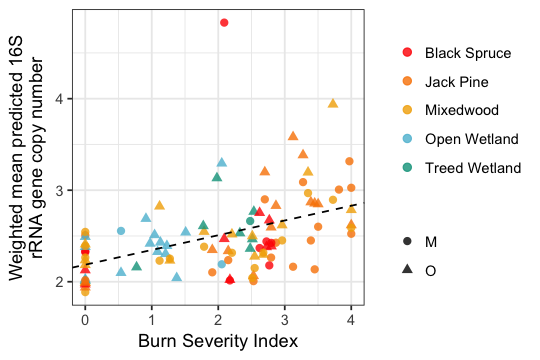

In [12]:
options(repr.plot.width=4.5, repr.plot.height=3)

line = lm(WtMeanCopyNum~Burn_Severity_Index,df)

p = ggplot(df,aes(x=Burn_Severity_Index-1,y=WtMeanCopyNum,fill=Veg_Comm,color=Veg_Comm, shape=Org_or_Min))
p = p + geom_point(alpha=0.8,size=2)
#p = p + facet_grid(~Land_Class)
p = p + ylab("Weighted mean predicted 16S\nrRNA gene copy number")
p = p + xlab("Burn Severity Index")
p = p + theme_bw()
#p = p + scale_shape_manual(values=c(21,22))
p = p + scale_fill_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_color_manual(values=wes_palette("Darjeeling")[c(1,4,3,5,2)])
p = p + scale_shape_manual(values=c(16,17,23,25,15))
p = p + guides(fill=guide_legend(title=element_blank()),color=guide_legend(title=element_blank()),shape=guide_legend(title=element_blank()))
p = p + geom_abline(slope=line[[1]][2], intercept=line[[1]][1]+line[[1]][2],linetype=2)
p
line[[1]][2]
line[[1]][1]+line[[1]][2]

# Note adjustments to line equation - Burn Severity Index was stored as BSI+1, to remove 0 values from unburned sites
# for analyses where it is logged, but is usually reported as 0-4. Adjustment accounts for this.
# There is no effect on the p or R2 value from doing this.